#RRHH - Probabilidad de desercion de empleados 

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Introduccion

**Motivacion y audiencia** La Gerencia General solicita realizar un analisis del area de RRHH al detectar renuncias de empleados valiosos

#Objetivos

El objetivo general de este Analisis sera determinar cuales son las caracteristicas de los empleados que tienen mas probabilidad de renunciar al empleo

- Intentar reducir el tiempo de seleccion de candidatos
- Implementar medidas para retener a los empleados que la Empresa desee mantener

**Contexto comercial** 
La empresa gasta mas del 15% del salario de sus empleados en la tarea de contratar nuevos candidatos.
Se dedica al menos un 40% de la jornada laboral de los responsables de RRHH a tareas de busqueda, entrevistas, seleccion, etc.


**Problema comercial**
Tanto la tarea de contratar, como la de retener empleados requieren de una inversion grande de tiempo y dinero.
Cada vez que un empleado abandona su puesto, queda un cumulo de tareas pendientes o que se cubren con horas extras de otros empleados, sumado al tiempo que lleva capacitar y entrenar en el nuevo puesto a un empleado que ingresa.
 

**Contexto analítico**
Se tomo como base un archivo de Excel que contiene detalles sobre cada empleado, con una variable target definida en la columna DESERCION, que indica si el empleado abandono o no la empresa. 
Contiene ademas informacion como Edad, Educacion, Ingresos Mensuales, Distancia a su casa, Porcentaje de incremento de salario, etc.

**Exploratory Data Analysis (EDA)**

In [4]:
%cd '/content/gdrive/MyDrive/CoderHouse/Data Science'
df_rrhh= pd.read_excel('RRHH.xlsx')
df_rrhh.head(8)

/content/gdrive/MyDrive/CoderHouse/Data Science


,EDAD,DESERCION,VIAJE DE NEGOCIOS,INGRESOS DIARIOS,DEPARTAMENTO,DISTANCIA DESDE CASA,EDUCACION,CAMPO EDUCATIVO,NRO. EMPLEADO,GENERO,...,SATISFACCION EN SUS RELACIONES,HORAS ESTANDAR,NIVEL DE ACCIONES DE LA EMPRESA,TOTAL AÑOS DE TRABAJO,TIEMPOS DE ENTRENAMIENTO EL AÑO PASADO,EQUILIBRIO VIDA-TRABAJO,AÑOS EN LA EMPRESA,AÑOS EN EL CARGO ACTUAL,AÑOS DESDE LA ULTIMA PROMOCION,AÑOS CON EL GERENTE ACTUAL
0,35,No,No viaja,1225,Investigación y desarrollo,2,4,Humanidades,771,Femenino,...,1,80,1,16,2,4,1,0,0,0
1,40,No,Viaja poco,1194,Investigación y desarrollo,1,3,Humanidades,1822,Femenino,...,4,80,1,12,3,3,5,3,0,3
2,40,No,Viaja poco,750,Investigación y desarrollo,12,3,Humanidades,1829,Femenino,...,2,80,1,15,3,3,7,4,7,7
3,32,No,No viaja,1146,Investigación y desarrollo,15,4,Medicina,1955,Femenino,...,2,80,1,9,6,3,5,1,1,2
4,37,No,Viaja poco,367,Investigación y desarrollo,25,2,Medicina,1161,Femenino,...,3,80,2,9,2,3,6,2,1,3
5,40,No,Viaja poco,1202,Investigación y desarrollo,2,1,Medicina,1375,Femenino,...,2,80,3,15,0,3,12,11,11,8
6,36,No,Viaja poco,1223,Investigación y desarrollo,8,3,Tecnico,83,Femenino,...,2,80,3,17,2,3,17,14,12,8
7,37,No,No viaja,1040,Investigación y desarrollo,2,2,Humanidades,139,Masculino,...,4,80,1,17,2,4,1,0,0,0


In [5]:
df_rrhh.describe()

,EDAD,INGRESOS DIARIOS,DISTANCIA DESDE CASA,EDUCACION,NRO. EMPLEADO,TARIFA POR HORA,SATISFACCION LABORAL,INGRESO MENSUAL,RATIO MENSUAL,CANTIDAD DE EMPRESAS EN LAS QUE TRABAJO,...,SATISFACCION EN SUS RELACIONES,HORAS ESTANDAR,NIVEL DE ACCIONES DE LA EMPRESA,TOTAL AÑOS DE TRABAJO,TIEMPOS DE ENTRENAMIENTO EL AÑO PASADO,EQUILIBRIO VIDA-TRABAJO,AÑOS EN LA EMPRESA,AÑOS EN EL CARGO ACTUAL,AÑOS DESDE LA ULTIMA PROMOCION,AÑOS CON EL GERENTE ACTUAL
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,65.891156,2.728571,6502.931293,14313.103401,2.693197,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,20.329428,1.102846,4707.956783,7117.786044,2.498009,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,48.000000,2.000000,2911.000000,8047.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,66.000000,3.000000,4919.000000,14235.500000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,83.750000,4.000000,8379.000000,20461.500000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,100.000000,4.000000,19999.000000,26999.000000,9.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df_rrhh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   EDAD                                                1470 non-null   int64 
 1   DESERCION                                           1470 non-null   object
 2   VIAJE DE NEGOCIOS                                   1470 non-null   object
 3   INGRESOS DIARIOS                                    1470 non-null   int64 
 4   DEPARTAMENTO                                        1470 non-null   object
 5   DISTANCIA DESDE CASA                                1470 non-null   int64 
 6   EDUCACION                                           1470 non-null   int64 
 7   CAMPO EDUCATIVO                                     1470 non-null   object
 8   NRO. EMPLEADO                                       1470 non-null   int64 
 9   GENERO  

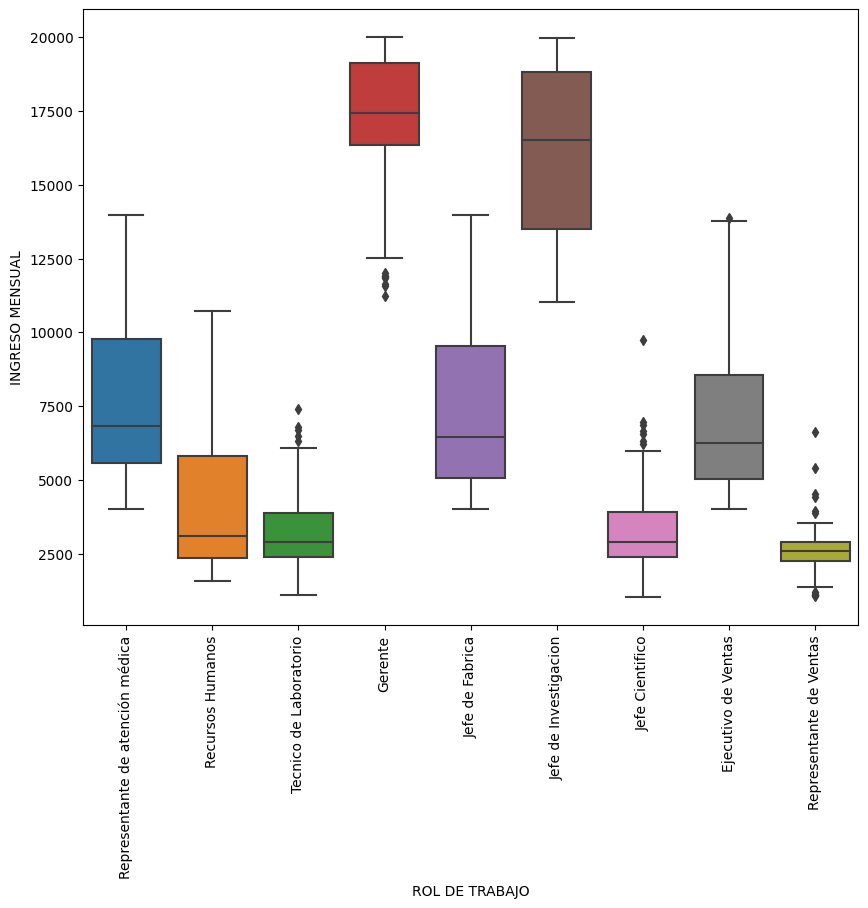

In [7]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="ROL DE TRABAJO", y="INGRESO MENSUAL", data = df_rrhh)
ax.tick_params(axis='x', rotation=90)
plt.show()

Se observa que los Representantes de Ventas tienen ingresos muy bajos, e incluso los Jefes Cientificos y Tecnicos de Laboratorio tienen sueldos bajos.

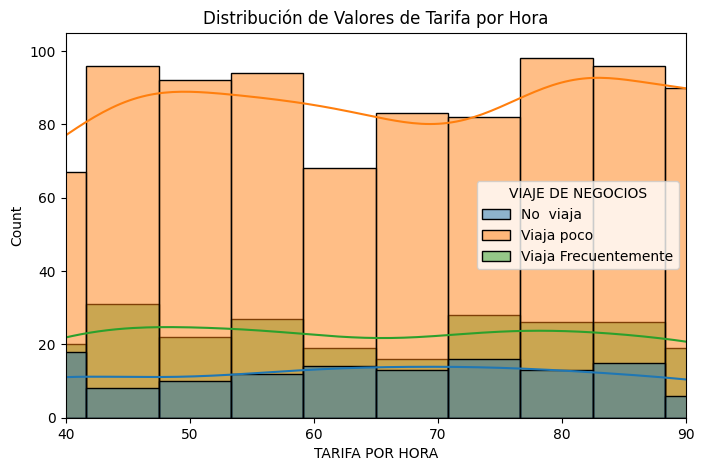

In [8]:
plt.figure(figsize=(8,5))
grafica = sns.histplot(data=df_rrhh, x='TARIFA POR HORA', kde=True, hue='VIAJE DE NEGOCIOS')
grafica.set_title('Distribución de Valores de Tarifa por Hora')
plt.xlim((40,90))
plt.show()

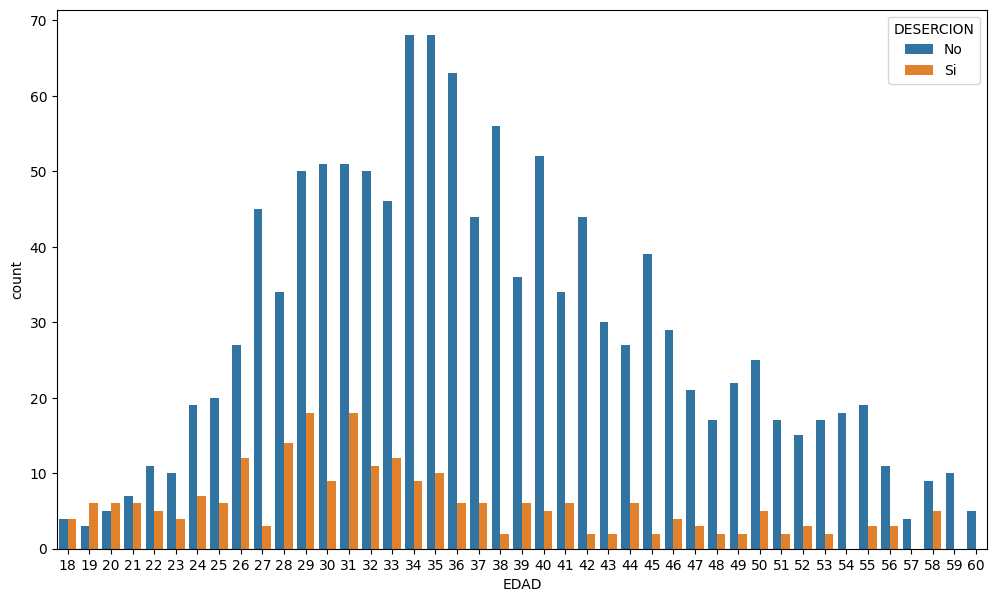

In [9]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'EDAD', hue = 'DESERCION', data = df_rrhh)
plt.show()

En cuanto edades, se observa que en los extremos, jovenes de 18 a 23 y a partir de los 51 años las personas se quedan en la empresa, a diferencia del rango que ronda los 30 años, que tiene mayor incidencia de renuncia. 

In [10]:
df_rrhh['DESERCION'] = df_rrhh['DESERCION'].replace('Si', 0)
df_rrhh.head(5)

,EDAD,DESERCION,VIAJE DE NEGOCIOS,INGRESOS DIARIOS,DEPARTAMENTO,DISTANCIA DESDE CASA,EDUCACION,CAMPO EDUCATIVO,NRO. EMPLEADO,GENERO,...,SATISFACCION EN SUS RELACIONES,HORAS ESTANDAR,NIVEL DE ACCIONES DE LA EMPRESA,TOTAL AÑOS DE TRABAJO,TIEMPOS DE ENTRENAMIENTO EL AÑO PASADO,EQUILIBRIO VIDA-TRABAJO,AÑOS EN LA EMPRESA,AÑOS EN EL CARGO ACTUAL,AÑOS DESDE LA ULTIMA PROMOCION,AÑOS CON EL GERENTE ACTUAL
0,35,No,No viaja,1225,Investigación y desarrollo,2,4,Humanidades,771,Femenino,...,1,80,1,16,2,4,1,0,0,0
1,40,No,Viaja poco,1194,Investigación y desarrollo,1,3,Humanidades,1822,Femenino,...,4,80,1,12,3,3,5,3,0,3
2,40,No,Viaja poco,750,Investigación y desarrollo,12,3,Humanidades,1829,Femenino,...,2,80,1,15,3,3,7,4,7,7
3,32,No,No viaja,1146,Investigación y desarrollo,15,4,Medicina,1955,Femenino,...,2,80,1,9,6,3,5,1,1,2
4,37,No,Viaja poco,367,Investigación y desarrollo,25,2,Medicina,1161,Femenino,...,3,80,2,9,2,3,6,2,1,3


In [11]:
df_rrhh['DESERCION'] = df_rrhh['DESERCION'].replace('No', 1)
df_rrhh.head(5)

,EDAD,DESERCION,VIAJE DE NEGOCIOS,INGRESOS DIARIOS,DEPARTAMENTO,DISTANCIA DESDE CASA,EDUCACION,CAMPO EDUCATIVO,NRO. EMPLEADO,GENERO,...,SATISFACCION EN SUS RELACIONES,HORAS ESTANDAR,NIVEL DE ACCIONES DE LA EMPRESA,TOTAL AÑOS DE TRABAJO,TIEMPOS DE ENTRENAMIENTO EL AÑO PASADO,EQUILIBRIO VIDA-TRABAJO,AÑOS EN LA EMPRESA,AÑOS EN EL CARGO ACTUAL,AÑOS DESDE LA ULTIMA PROMOCION,AÑOS CON EL GERENTE ACTUAL
0,35,1,No viaja,1225,Investigación y desarrollo,2,4,Humanidades,771,Femenino,...,1,80,1,16,2,4,1,0,0,0
1,40,1,Viaja poco,1194,Investigación y desarrollo,1,3,Humanidades,1822,Femenino,...,4,80,1,12,3,3,5,3,0,3
2,40,1,Viaja poco,750,Investigación y desarrollo,12,3,Humanidades,1829,Femenino,...,2,80,1,15,3,3,7,4,7,7
3,32,1,No viaja,1146,Investigación y desarrollo,15,4,Medicina,1955,Femenino,...,2,80,1,9,6,3,5,1,1,2
4,37,1,Viaja poco,367,Investigación y desarrollo,25,2,Medicina,1161,Femenino,...,3,80,2,9,2,3,6,2,1,3


In [12]:
df_rrhh['DESERCION']

0       1
1       1
2       1
3       1
4       1
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: DESERCION, Length: 1470, dtype: int64

In [13]:
emp_se_van = df_rrhh[df_rrhh['DESERCION'] == 0]
emp_se_quedan = df_rrhh[df_rrhh['DESERCION'] == 1] 


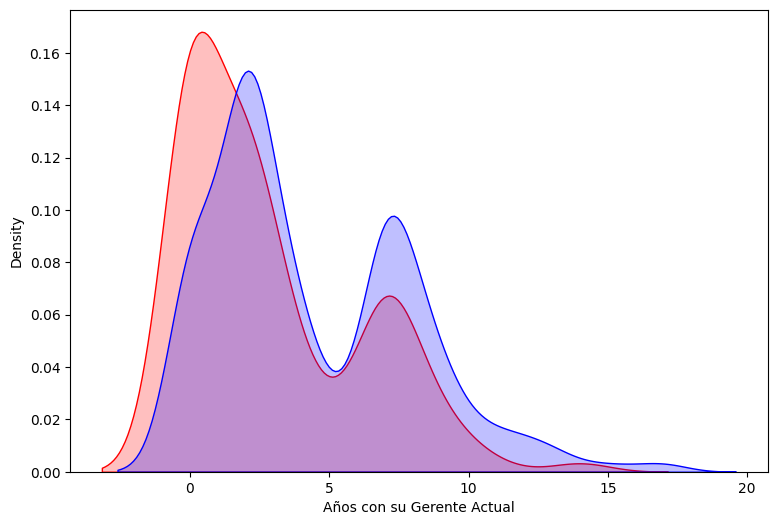

In [14]:
plt.figure(figsize=(9, 6))
sns.kdeplot(emp_se_van['AÑOS CON EL GERENTE ACTUAL'], label = "Empleados que se van", fill = True, color = 'r')
sns.kdeplot(emp_se_quedan['AÑOS CON EL GERENTE ACTUAL'], label = "Empleados que se quedan", fill = True, color = 'b')
plt.xlabel('Años con su Gerente Actual')
plt.show()

Se observa que a partir de los 5 años de trabajar con su Gerente actual, tienden a quedarse 

<ipython-input-15-aa94a2f1248d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mapa_calor = df_rrhh.corr()


<Axes: >

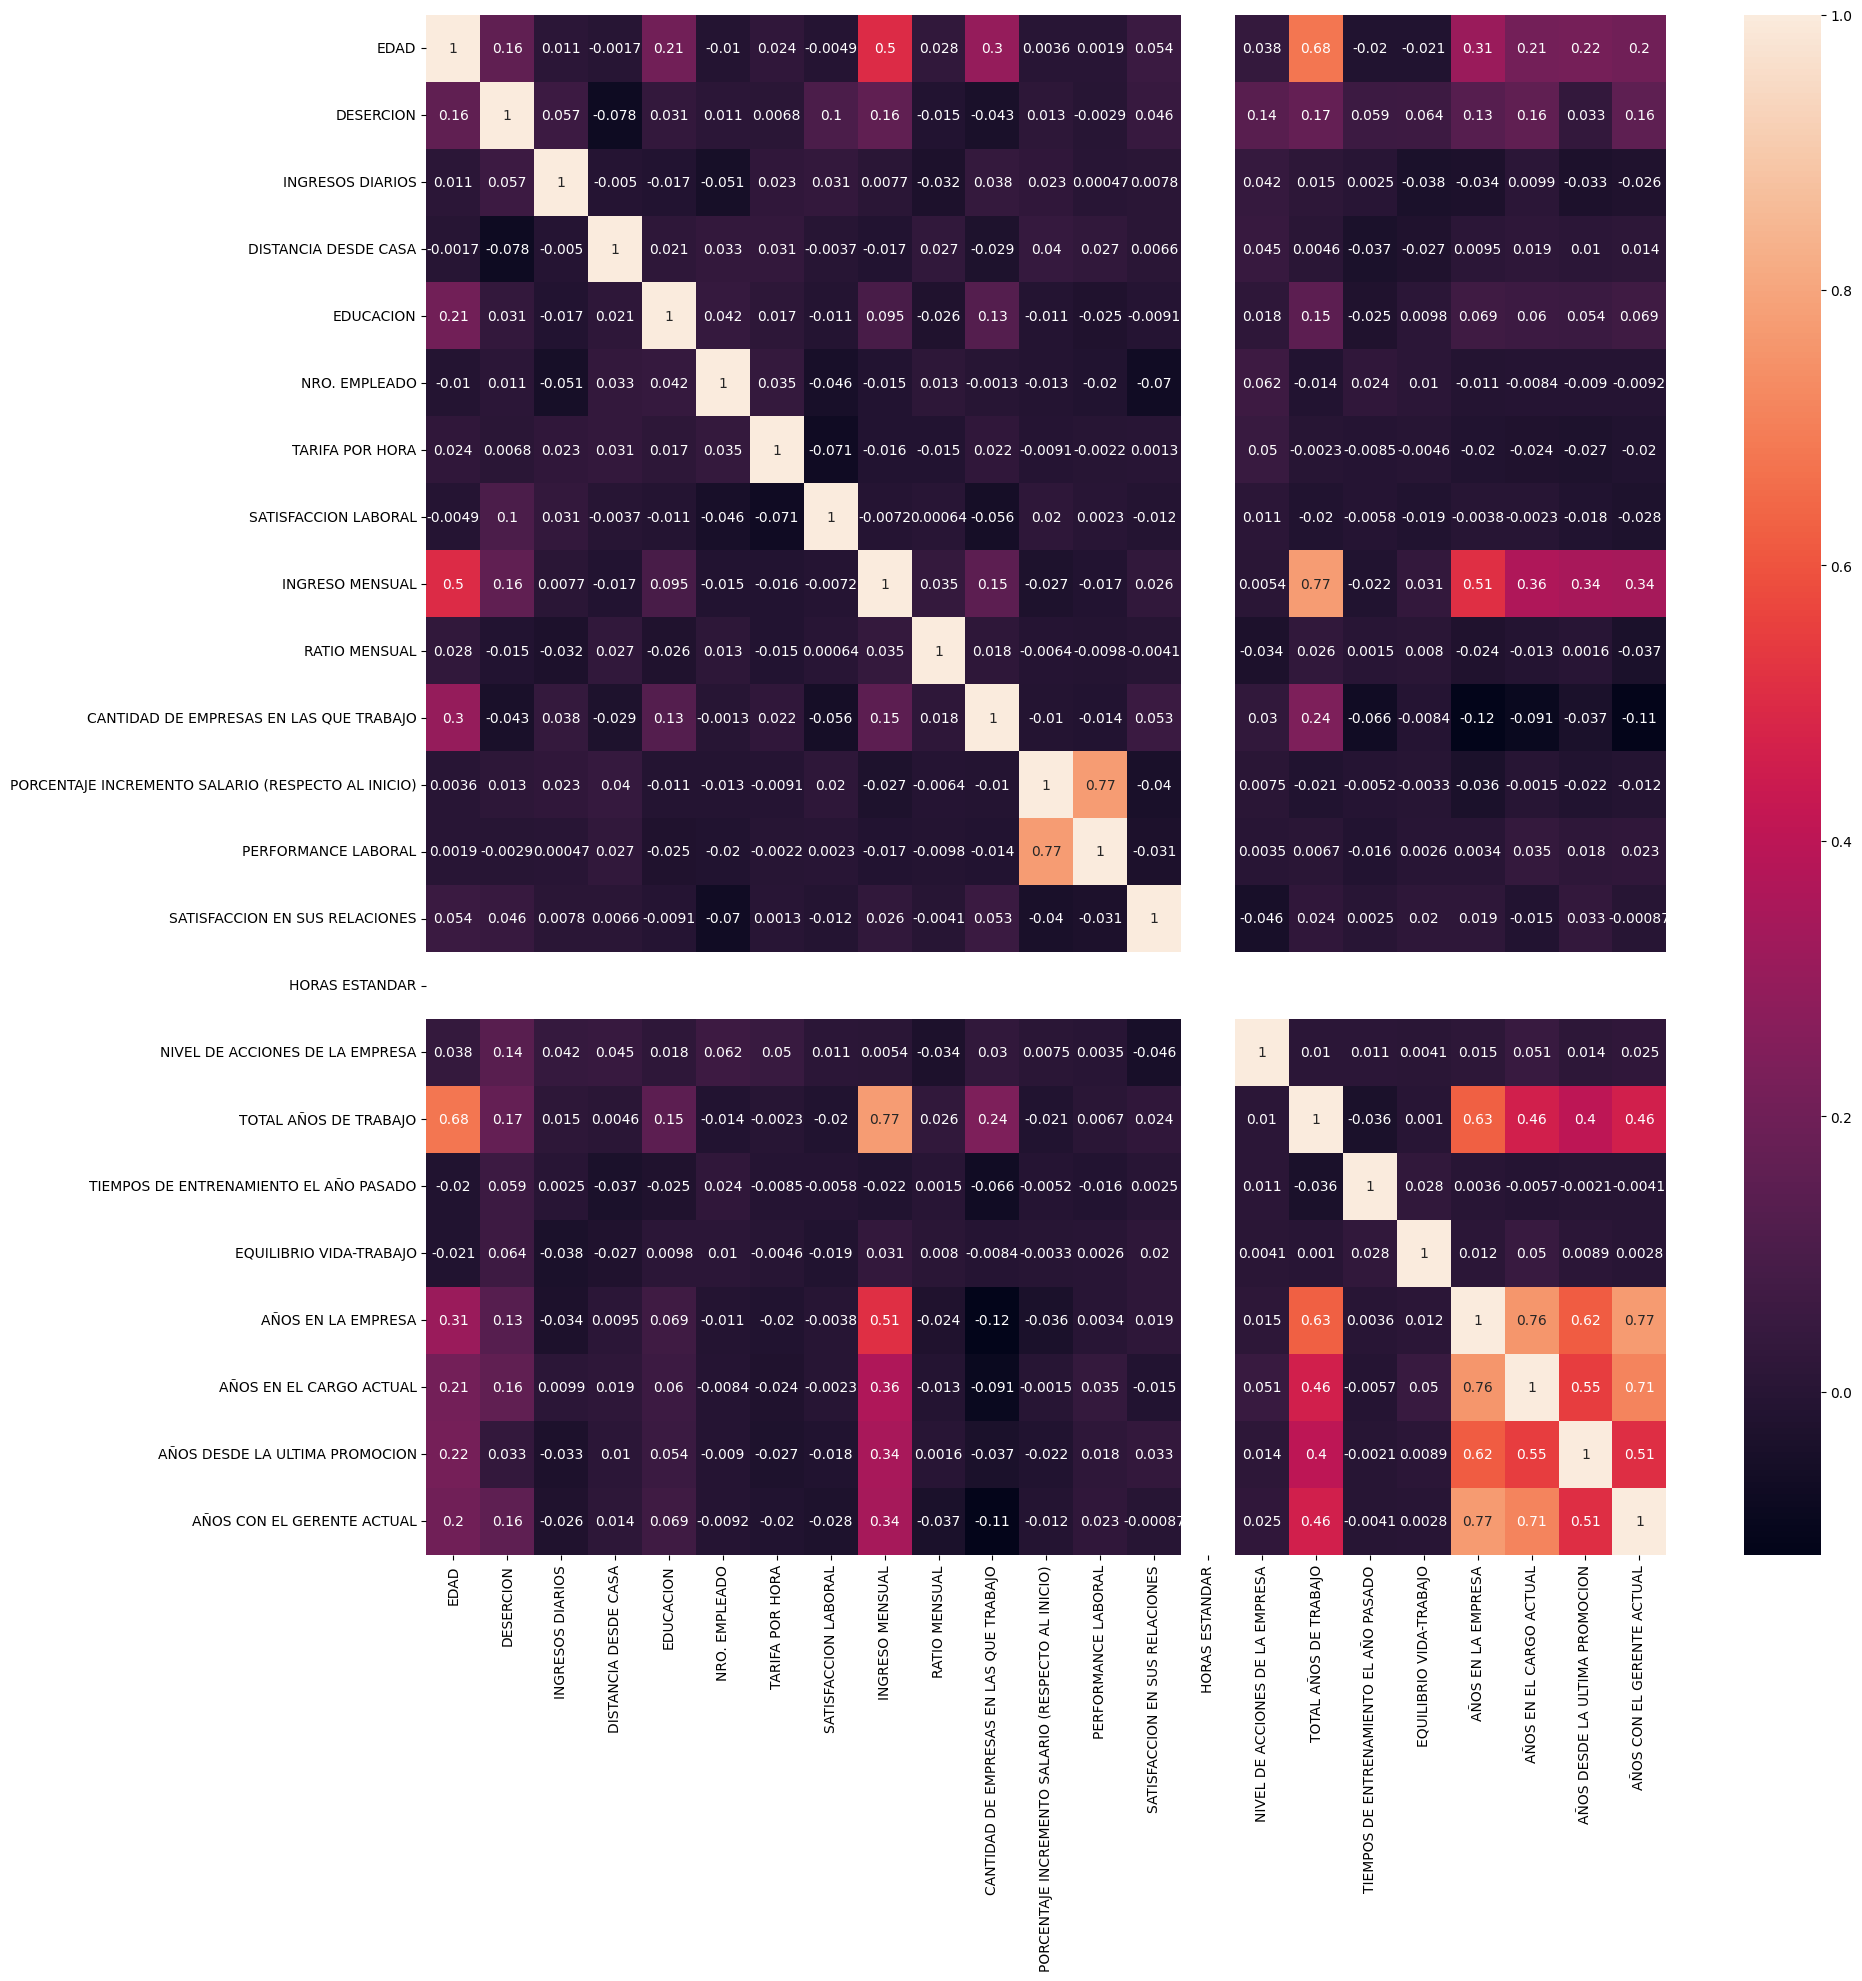

In [15]:
mapa_calor = df_rrhh.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(mapa_calor, annot=True)

Las conclusiones segun el mapa de calor son las siguientes:
- Quienes tienen sueldos altos, a su vez tienen muchos años en la Empresa.
- La Empresa incrementa sueldos en funcion del desempeño laboral.
- A mayor edad, aumenta tambien la cantidad de años en la Empresa.

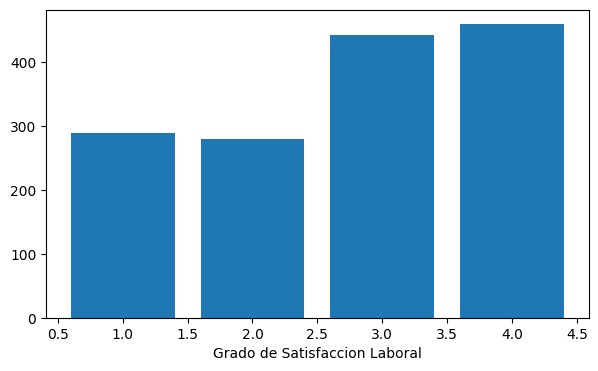

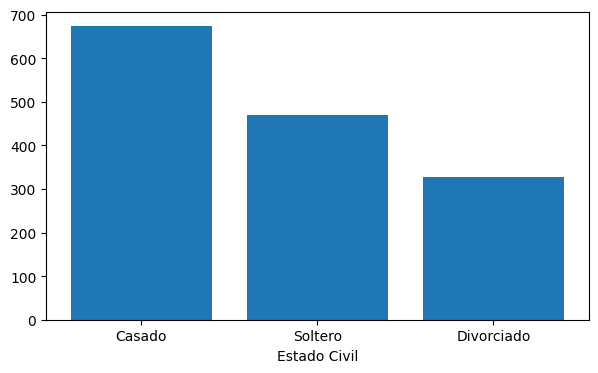

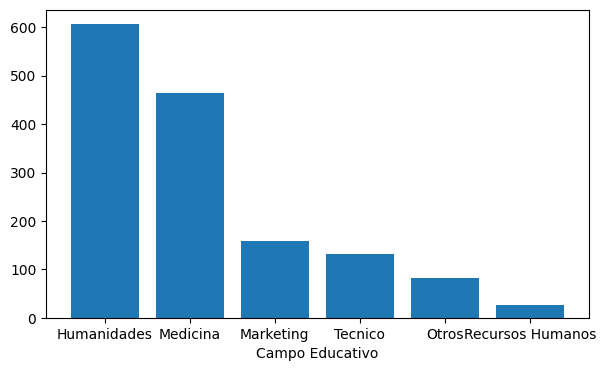

In [16]:
plt.figure(figsize=(7, 4))
counts = df_rrhh["SATISFACCION LABORAL"].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Grado de Satisfaccion Laboral')
plt.figure(figsize=(7, 4))
counts = df_rrhh["ESTADO CIVIL"].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Estado Civil')
plt.figure(figsize=(7, 4))
counts = df_rrhh["CAMPO EDUCATIVO"].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Campo Educativo')
plt.show()

#Preguntas de interes e hipotesis

¿Los empleados que trabajaron durante muchos años en la Empresa tienden a quedarse?
¿Los empleados con sueldos mas altos se quedan?
¿Los empleados que tienen largas distancias a su trabajo, suelen renunciar al poco tiempo?
¿Cuando los empleados tienen un alto numero de empresas en las que trabajaron, es probable que se vaya antes?
¿El estado civil tiene alguna relacion con irse o quedarse?

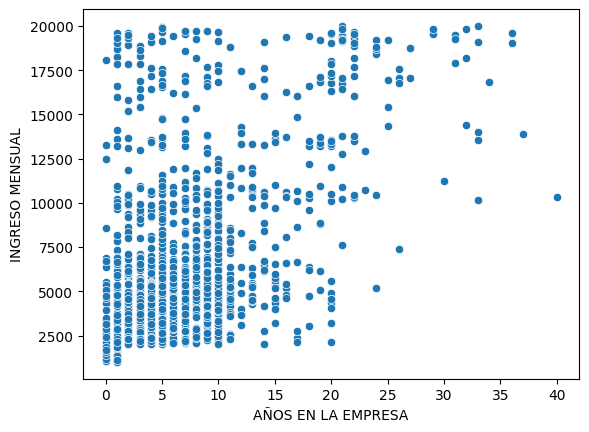

In [17]:
sns.scatterplot(x='AÑOS EN LA EMPRESA', y='INGRESO MENSUAL', data=df_rrhh)
plt.show()

Pareciera que los empleados con mas de 20 años en la Empresa no evidencian un marcado aumento de sueldo, respecto de los empleados mas nuevos.

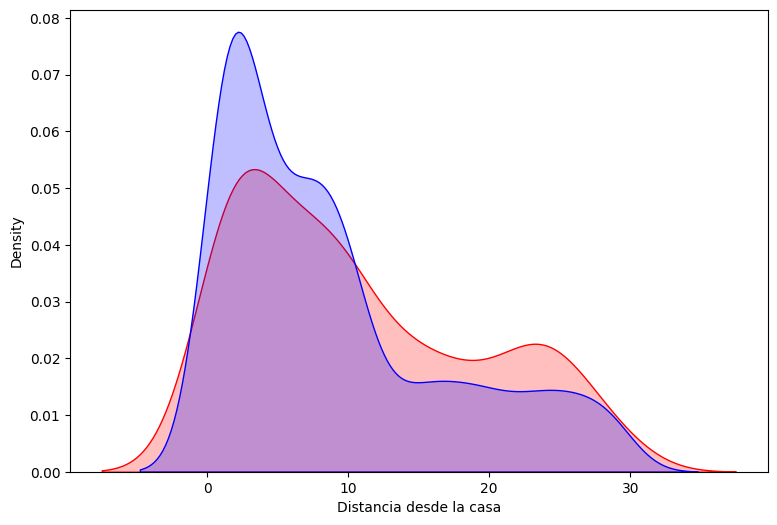

In [18]:
plt.figure(figsize=(9, 6))
sns.kdeplot(emp_se_van['DISTANCIA DESDE CASA'], label = "Empleados que se van", fill = True, color = 'r')
sns.kdeplot(emp_se_quedan['DISTANCIA DESDE CASA'], label = "Empleados que se quedan", fill = True, color = 'b')
plt.xlabel('Distancia desde la casa')
plt.show()

Se observa que es mas probable que se vayan cuando la distancia a su casa es mayor

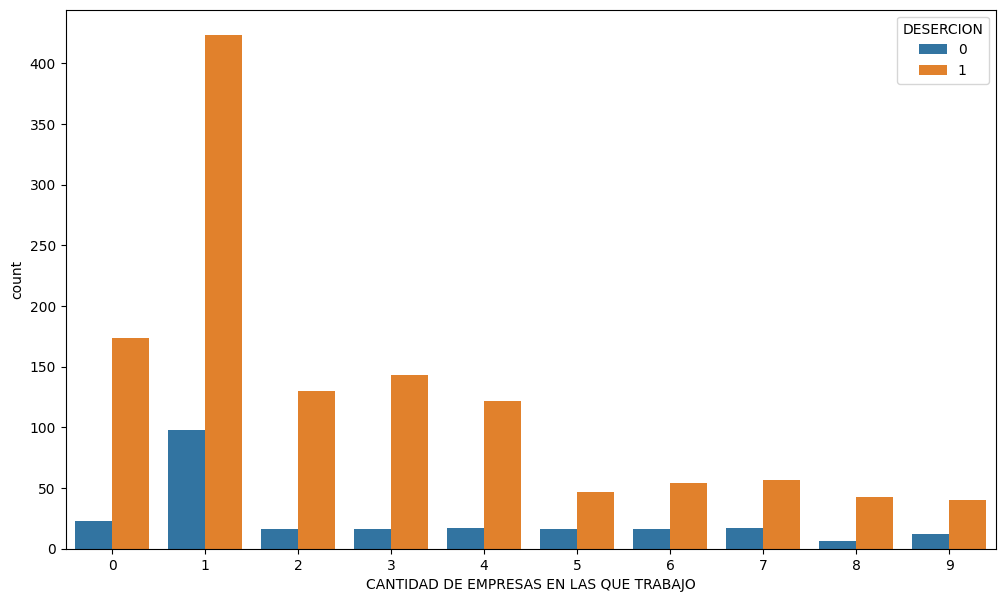

In [19]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'CANTIDAD DE EMPRESAS EN LAS QUE TRABAJO', hue = 'DESERCION', data = df_rrhh)
plt.show()

Se observa una tendencia marcada de quienes trabajaron en solo una empresa son mas proclives a quedarse

In [20]:
pd.crosstab(df_rrhh['DESERCION'],df_rrhh['CANTIDAD DE EMPRESAS EN LAS QUE TRABAJO'])

CANTIDAD DE EMPRESAS EN LAS QUE TRABAJO,0,1,2,3,4,5,6,7,8,9
DESERCION,,,,,,,,,,
0,23,98,16,16,17,16,16,17,6,12
1,174,423,130,143,122,47,54,57,43,40


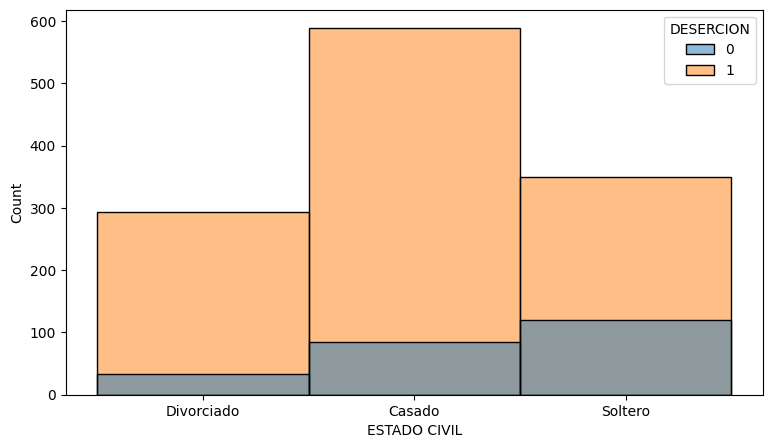

In [21]:
plt.figure(figsize=[9,5])
sns.histplot(x = 'ESTADO CIVIL', hue = 'DESERCION', data = df_rrhh)
plt.show()

En cuanto al estado civil, los casados pareciera que tienen mas tendencia a quedarse en la Empresa.

#Feature Selection

El metodo es el de Clasificación, donde se trata de clasificar la variable target: Desercion/No Desercion.
Luego de generar la Matriz de Confusion, las metricas a utilizar seran: accuracy, precision y recall.

In [22]:
X = df_rrhh.drop("DESERCION", 1)       # feature matrix
y = df_rrhh['DESERCION']               # target feature
df_rrhh.head()

<ipython-input-22-01000169b138>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_rrhh.drop("DESERCION", 1)       # feature matrix


,EDAD,DESERCION,VIAJE DE NEGOCIOS,INGRESOS DIARIOS,DEPARTAMENTO,DISTANCIA DESDE CASA,EDUCACION,CAMPO EDUCATIVO,NRO. EMPLEADO,GENERO,...,SATISFACCION EN SUS RELACIONES,HORAS ESTANDAR,NIVEL DE ACCIONES DE LA EMPRESA,TOTAL AÑOS DE TRABAJO,TIEMPOS DE ENTRENAMIENTO EL AÑO PASADO,EQUILIBRIO VIDA-TRABAJO,AÑOS EN LA EMPRESA,AÑOS EN EL CARGO ACTUAL,AÑOS DESDE LA ULTIMA PROMOCION,AÑOS CON EL GERENTE ACTUAL
0,35,1,No viaja,1225,Investigación y desarrollo,2,4,Humanidades,771,Femenino,...,1,80,1,16,2,4,1,0,0,0
1,40,1,Viaja poco,1194,Investigación y desarrollo,1,3,Humanidades,1822,Femenino,...,4,80,1,12,3,3,5,3,0,3
2,40,1,Viaja poco,750,Investigación y desarrollo,12,3,Humanidades,1829,Femenino,...,2,80,1,15,3,3,7,4,7,7
3,32,1,No viaja,1146,Investigación y desarrollo,15,4,Medicina,1955,Femenino,...,2,80,1,9,6,3,5,1,1,2
4,37,1,Viaja poco,367,Investigación y desarrollo,25,2,Medicina,1161,Femenino,...,3,80,2,9,2,3,6,2,1,3


In [23]:
X

,EDAD,VIAJE DE NEGOCIOS,INGRESOS DIARIOS,DEPARTAMENTO,DISTANCIA DESDE CASA,EDUCACION,CAMPO EDUCATIVO,NRO. EMPLEADO,GENERO,TARIFA POR HORA,...,SATISFACCION EN SUS RELACIONES,HORAS ESTANDAR,NIVEL DE ACCIONES DE LA EMPRESA,TOTAL AÑOS DE TRABAJO,TIEMPOS DE ENTRENAMIENTO EL AÑO PASADO,EQUILIBRIO VIDA-TRABAJO,AÑOS EN LA EMPRESA,AÑOS EN EL CARGO ACTUAL,AÑOS DESDE LA ULTIMA PROMOCION,AÑOS CON EL GERENTE ACTUAL
0,35,No viaja,1225,Investigación y desarrollo,2,4,Humanidades,771,Femenino,61,...,1,80,1,16,2,4,1,0,0,0
1,40,Viaja poco,1194,Investigación y desarrollo,1,3,Humanidades,1822,Femenino,52,...,4,80,1,12,3,3,5,3,0,3
2,40,Viaja poco,750,Investigación y desarrollo,12,3,Humanidades,1829,Femenino,47,...,2,80,1,15,3,3,7,4,7,7
3,32,No viaja,1146,Investigación y desarrollo,15,4,Medicina,1955,Femenino,34,...,2,80,1,9,6,3,5,1,1,2
4,37,Viaja poco,367,Investigación y desarrollo,25,2,Medicina,1161,Femenino,52,...,3,80,2,9,2,3,6,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,24,Viaja poco,1448,Ventas,1,1,Tecnico,554,Femenino,62,...,2,80,0,6,4,3,5,3,1,4
1466,25,Viaja Frecuentemente,599,Ventas,24,1,Humanidades,1273,Masculino,73,...,4,80,0,1,4,3,1,0,1,0
1467,18,Viaja Frecuentemente,1306,Ventas,5,3,Marketing,614,Masculino,69,...,4,80,0,0,3,3,0,0,0,0
1468,19,Viaja poco,528,Ventas,22,1,Marketing,167,Masculino,50,...,4,80,0,0,2,2,0,0,0,0


In [24]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: DESERCION, Length: 1470, dtype: int64

In [25]:
X_categ = df_rrhh[['VIAJE DE NEGOCIOS','DEPARTAMENTO','CAMPO EDUCATIVO','GENERO','ROL DE TRABAJO','ESTADO CIVIL','HACE HORAS EXTRAS']]

In [26]:
X_categ

,VIAJE DE NEGOCIOS,DEPARTAMENTO,CAMPO EDUCATIVO,GENERO,ROL DE TRABAJO,ESTADO CIVIL,HACE HORAS EXTRAS
0,No viaja,Investigación y desarrollo,Humanidades,Femenino,Representante de atención médica,Divorciado,No
1,Viaja poco,Investigación y desarrollo,Humanidades,Femenino,Representante de atención médica,Divorciado,No
2,Viaja poco,Investigación y desarrollo,Humanidades,Femenino,Representante de atención médica,Divorciado,No
3,No viaja,Investigación y desarrollo,Medicina,Femenino,Representante de atención médica,Divorciado,No
4,Viaja poco,Investigación y desarrollo,Medicina,Femenino,Representante de atención médica,Divorciado,No
...,...,...,...,...,...,...,...
1465,Viaja poco,Ventas,Tecnico,Femenino,Representante de Ventas,Soltero,Si
1466,Viaja Frecuentemente,Ventas,Humanidades,Masculino,Representante de Ventas,Soltero,Si
1467,Viaja Frecuentemente,Ventas,Marketing,Masculino,Representante de Ventas,Soltero,Si
1468,Viaja poco,Ventas,Marketing,Masculino,Representante de Ventas,Soltero,Si


In [27]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_categ = onehotencoder.fit_transform(X_categ).toarray()

In [28]:
X_categ.shape

(1470, 28)

In [29]:
X_categ = pd.DataFrame(X_categ)
X_categ

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1466,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1467,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [30]:
X_numer = df_rrhh[['EDAD','INGRESOS DIARIOS','DISTANCIA DESDE CASA','EDUCACION','TARIFA POR HORA','SATISFACCION LABORAL','INGRESO MENSUAL','RATIO MENSUAL','CANTIDAD DE EMPRESAS EN LAS QUE TRABAJO','PORCENTAJE INCREMENTO SALARIO (RESPECTO AL INICIO)','PERFORMANCE LABORAL','SATISFACCION EN SUS RELACIONES','HORAS ESTANDAR','NIVEL DE ACCIONES DE LA EMPRESA','TOTAL AÑOS DE TRABAJO','TIEMPOS DE ENTRENAMIENTO EL AÑO PASADO','EQUILIBRIO VIDA-TRABAJO','AÑOS EN LA EMPRESA','AÑOS EN EL CARGO ACTUAL','AÑOS DESDE LA ULTIMA PROMOCION','AÑOS CON EL GERENTE ACTUAL']]

In [31]:
X_numer

,EDAD,INGRESOS DIARIOS,DISTANCIA DESDE CASA,EDUCACION,TARIFA POR HORA,SATISFACCION LABORAL,INGRESO MENSUAL,RATIO MENSUAL,CANTIDAD DE EMPRESAS EN LAS QUE TRABAJO,PORCENTAJE INCREMENTO SALARIO (RESPECTO AL INICIO),...,SATISFACCION EN SUS RELACIONES,HORAS ESTANDAR,NIVEL DE ACCIONES DE LA EMPRESA,TOTAL AÑOS DE TRABAJO,TIEMPOS DE ENTRENAMIENTO EL AÑO PASADO,EQUILIBRIO VIDA-TRABAJO,AÑOS EN LA EMPRESA,AÑOS EN EL CARGO ACTUAL,AÑOS DESDE LA ULTIMA PROMOCION,AÑOS CON EL GERENTE ACTUAL
0,35,1225,2,4,61,1,5093,4761,2,11,...,1,80,1,16,2,4,1,0,0,0
1,40,1194,1,3,52,4,6513,9060,4,17,...,4,80,1,12,3,3,5,3,0,3
2,40,750,12,3,47,1,4448,10748,2,12,...,2,80,1,15,3,3,7,4,7,7
3,32,1146,15,4,34,4,6667,16542,5,18,...,2,80,1,9,6,3,5,1,1,2
4,37,367,25,2,52,4,5731,17171,7,13,...,3,80,2,9,2,3,6,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,24,1448,1,1,62,2,3202,21972,1,16,...,2,80,0,6,4,3,5,3,1,4
1466,25,599,24,1,73,4,1118,8040,1,14,...,4,80,0,1,4,3,1,0,1,0
1467,18,1306,5,3,69,2,1878,8059,1,14,...,4,80,0,0,3,3,0,0,0,0
1468,19,528,22,1,50,3,1675,26820,1,19,...,4,80,0,0,2,2,0,0,0,0


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_numer = scaler.fit_transform(X_numer)

In [33]:
X_numer

array([[0.4047619 , 0.80386543, 0.03571429, ..., 0.        , 0.        ,
        0.        ],
       [0.52380952, 0.78167502, 0.        , ..., 0.16666667, 0.        ,
        0.17647059],
       [0.52380952, 0.46385111, 0.39285714, ..., 0.22222222, 0.46666667,
        0.41176471],
       ...,
       [0.        , 0.86184681, 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       [0.02380952, 0.30493916, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.02380952, 0.22691482, 0.71428571, ..., 0.        , 0.        ,
        0.        ]])

In [38]:
X_numer_df = pd.DataFrame(X_numer)

In [39]:
X_numer_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.404762,0.803865,0.035714,0.75,0.442857,0.000000,0.215061,0.107087,0.222222,0.000000,...,0.000000,0.0,0.333333,0.400,0.333333,1.000000,0.025,0.000000,0.000000,0.000000
1,0.523810,0.781675,0.000000,0.50,0.314286,1.000000,0.289837,0.279703,0.444444,0.428571,...,1.000000,0.0,0.333333,0.300,0.500000,0.666667,0.125,0.166667,0.000000,0.176471
2,0.523810,0.463851,0.392857,0.50,0.242857,0.000000,0.181095,0.347480,0.222222,0.071429,...,0.333333,0.0,0.333333,0.375,0.500000,0.666667,0.175,0.222222,0.466667,0.411765
3,0.333333,0.747316,0.500000,0.75,0.057143,1.000000,0.297946,0.580124,0.555556,0.500000,...,0.333333,0.0,0.333333,0.225,1.000000,0.666667,0.125,0.055556,0.066667,0.117647
4,0.452381,0.189692,0.857143,0.25,0.314286,1.000000,0.248657,0.605380,0.777778,0.142857,...,0.666667,0.0,0.666667,0.225,0.333333,0.666667,0.150,0.111111,0.066667,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.142857,0.963493,0.000000,0.00,0.457143,0.333333,0.115482,0.798153,0.111111,0.357143,...,0.333333,0.0,0.000000,0.150,0.666667,0.666667,0.125,0.166667,0.066667,0.235294
1466,0.166667,0.355762,0.821429,0.00,0.614286,1.000000,0.005740,0.238747,0.111111,0.214286,...,1.000000,0.0,0.000000,0.025,0.666667,0.666667,0.025,0.000000,0.066667,0.000000
1467,0.000000,0.861847,0.142857,0.50,0.557143,0.333333,0.045761,0.239510,0.111111,0.214286,...,1.000000,0.0,0.000000,0.000,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
1468,0.023810,0.304939,0.750000,0.00,0.285714,0.666667,0.035071,0.992813,0.111111,0.571429,...,1.000000,0.0,0.000000,0.000,0.333333,0.333333,0.000,0.000000,0.000000,0.000000


In [40]:
X_completa = pd.concat([X_categ, X_numer_df], axis = 1)
X_completa

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.333333,0.400,0.333333,1.000000,0.025,0.000000,0.000000,0.000000
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.000000,0.0,0.333333,0.300,0.500000,0.666667,0.125,0.166667,0.000000,0.176471
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.333333,0.0,0.333333,0.375,0.500000,0.666667,0.175,0.222222,0.466667,0.411765
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.333333,0.0,0.333333,0.225,1.000000,0.666667,0.125,0.055556,0.066667,0.117647
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.666667,0.0,0.666667,0.225,0.333333,0.666667,0.150,0.111111,0.066667,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.333333,0.0,0.000000,0.150,0.666667,0.666667,0.125,0.166667,0.066667,0.235294
1466,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.000000,0.0,0.000000,0.025,0.666667,0.666667,0.025,0.000000,0.066667,0.000000
1467,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.000000,0.0,0.000000,0.000,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
1468,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.000000,0.0,0.000000,0.000,0.333333,0.333333,0.000,0.000000,0.000000,0.000000


In [41]:
X = X_completa

In [42]:
y = df_rrhh['DESERCION']
y

0       1
1       1
2       1
3       1
4       1
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: DESERCION, Length: 1470, dtype: int64

#Regresion Lineal

In [43]:
!pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [45]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [46]:
sfs.fit(X, y)
sfs.k_feature_names_  

(1, 3, 11, 20, 22, 25, 26, 2, 5, 8, 14)

#Metricas algoritmos de clasificacion

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [48]:
X_train.shape

(1102, 49)

In [49]:
X_test.shape

(368, 49)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [51]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 83.96739130434783 %


<Axes: >

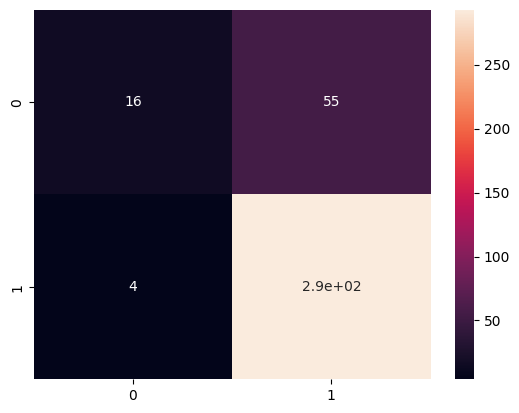

In [53]:
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.23      0.35        71
           1       0.84      0.99      0.91       297

    accuracy                           0.84       368
   macro avg       0.82      0.61      0.63       368
weighted avg       0.83      0.84      0.80       368



Conclusiones:


0 - Se queda en la Empresa: La precision del 0.62 es medianamente buena, teniendo en cuenta que la cantidad de instancias de empleados que se quedan  es del 14% del total del dataset, no resulta tan determinante que los valores de recall y f1-score sean menores a 0.50


1 - Se va de la Empresa: La precision del 0.90 es muy buena, al igual que el recall y el f1-score para las instancias de empleados que se van. 